## k-최근접 이웃의 한계
- 한계를 재현해 보자. 먼저 1절에서 사용한 데이터와 모델을 준비한다. 
- https://bit.ly/perch_data

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

이번에도 데이터를 훈련 세트와 테스트 세트로 나눈다. 특성 데이터는 2차원 배열로 변환한다. 

In [3]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눈다.
train_input, test_input, train_target, test_target = train_test_split(
                perch_length, perch_weight, random_state = 42
)

In [4]:
train_input.shape

(42,)

In [6]:
# 훈련 세트와 테스트 세트를 2차원 배열로 바꾼다.

train_input = train_input.reshape(42, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


최근접 이웃 개수를 3을 하는 모델을 훈련한다. 여기서는 1절에서 했던 내용 그대로이다. 

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.n_neighbors = 3

In [9]:
# 훈련 데이터로 훈련하고 테스트 데이터로 점수를 출력한다
knr.fit(train_input, train_target)
# 훈련 데이터의 점수를 출력
print(knr.score(train_input, train_target))

0.9804899950518966


In [10]:
# 테스트 데이터의 점수를 출력
print(knr.score(test_input, test_target))

0.9746459963987609


이제 이 모델을 사용해 길이가 50cm인 농어의 무게를 예측하겠다.

In [ ]:
knr.predict([[50]])

array([1033.33333333])

훈련된 모델은 50cm 농어의 무게를 1,033g 정도로 예측하였다. 그런데 실제 이 농어의 무게는 훨씬 더 많이 나간다고 한다. <br>
어디서 문제가 발생한 것일까 ? 

훈련 세트와 50cm의 농어 그리고 이 농어의 최근접 이웃을 산점도로 표시해 보자. <br>
분류 모델과 같이 k-최근접 이웃 모델의 kneighbors() 메서드를 사용하면 <br>
가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻을 수 있다.

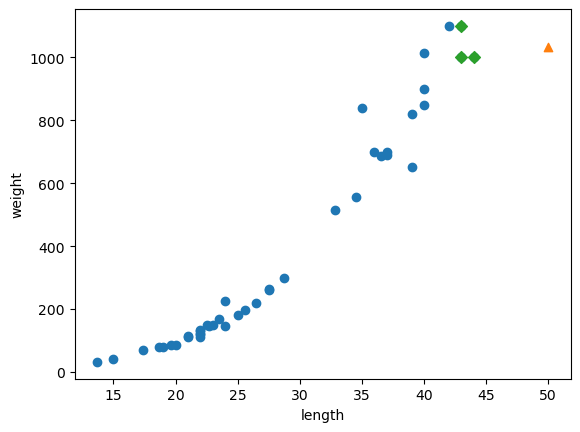

In [16]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(50, 1033, marker = '^')
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

당연히 길이가 커질 수록 농어의 무게가 증가한다. 그런데 50cm 농어에서 가장 가까운 것은 45cm 근방이기 때문에 <br>
k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균한다. 이웃 샘플의 평균을 구해 보자. 

In [18]:
np.mean(train_target[indexes])

1033.3333333333333

모델이 예측했던 값과 정확히 일치한다. 

k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균한다. <br>
따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다. <br>
예를 들어 *길이가 100cm인 농어*도 여전히 1,033g으로 예측한다. 

In [19]:
knr.predict([[100]])

array([1033.33333333])

한 번 더 그래프를 확인해 보자.

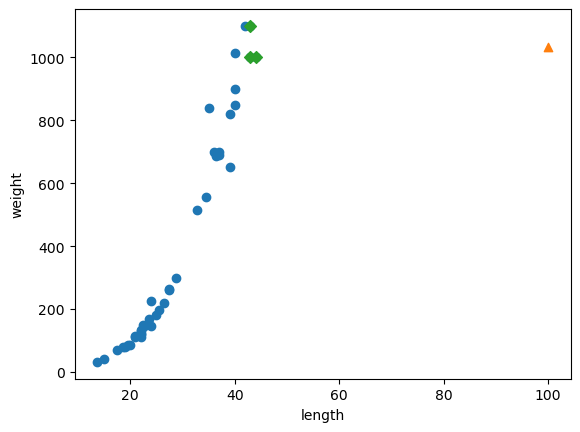

In [20]:
plt.scatter(train_input, train_target)
plt.scatter(100, 1033, marker = '^')
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

k-최근접 모델을 사용하지 말고, 분명히 이 문제를 해결할 수 있는 알고리즘이 있을 것이다. 

## 선형 회귀

**선형 회귀** : 널리 사용되는 대표적인 회귀 알고리즘이다.  <br>
비교적 간단하고 성능이 뛰어나기 때문에 맨 처음 배우는 머신러닝 알고리즘 중 하나이다. <br>
선형이라는 말에서 볼 수 있듯이 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다. <br>
당연히 그 특성을 가장 잘 나타낼 수 있는 직선을 찾아야 한다. 

사이킷런은 sklearn.linear_model 패키지 안에 ***LinearRegression*** 클래스로 선형 회귀를 한다. <br>
LinearRegression 클래스에도 fit(), score(), predict() 메서드가 있다. 

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [22]:
# 선형 회귀 모델을 훈련한다.
lr.fit(train_input, train_target)

LinearRegression()

In [23]:
lr.score(test_input, test_target)

0.8247503123313558

In [24]:
# 50cm 농어에 대해 예측한다. 
print(lr.predict([[50]]))

[1241.83860323]


하나의 직선을 그리려면 기울기와 절편이 있어야 한다. <br>
$y = a*x + b%=$와 같은 형태이다. 여기에서 x는 농어의 길이, y는 농어의 무게가 될 것이다. 

훈련한 후, 구한 a( 기울기 ) , b( 절편 ) 값을 알기 위해서는 lr 객체의 <br>
``` coef_, intercept_ ``` 속성을 통해 알 수 있다.

In [25]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


coef_ 속성 이름에서 알 수 있듯이 머신러닝에서 기울기를 종종 계수( coefficient ) 혹은 가중치( weight )라고 부른다. 

농어의 길이 15부터 50까지 직선으로 그려 보자. 이 직선을 그리려면 앞에서 구한 기울기와 절편을 사용하여<br>
(15, 15*lr.coef + lr.intercept) , (50, 50 * lr.coef_ + lr.intecept_) 를 구하면 된다. <br>
훈련 세트의 산점도도 같이 그려 보자. 

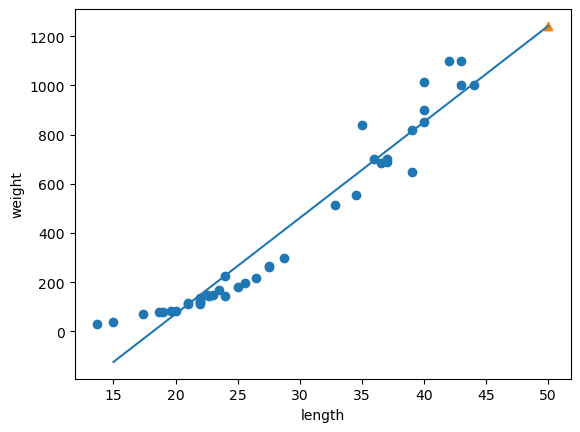

In [29]:
# 훈련 세트의 산점도 
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# 50cm 농어 데이터 - 무게는 아까 구한 값을 그대로 사용 
plt.scatter(50, 1241.8, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

바로 이 직선이 선형 회귀 알고리즘이 이 데이터셋에서 찾은 최적의 직선이다. <br>
길이가 50인 훈련 세트와 테스트 세트에 대한 $R^2$ 점수를 확인해 보자.

In [30]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


전체적으로 과소적합되어 있다. 그리고 그래프 왼쪽 아래를 보면 뭔가 이상하지 않은가 ?? 

## 다항 회귀

이 직선대로 예측하면 농어의 무게는 0g 이하로 갈 수가 없는데, 현실에서는 있을 수 없다. <br>
농어의 길이와 무게에 대한 산점도를 보면 일직선이라기보다 곡선의 형태이다. 

그렇다면, 최적의 직선보다 최적의 곡선을 찾는 것이 어떨까 ? 

이런 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 한다. 사실 넘파이를 이용하면 간단히 만들 수 있다. <br>
농어의 길이를 제곱해서 원래 데이터 앞에 붙여 보자. 

2장에서 사용했던 column_stack 함수를 사용하면 아주 간단하다.<br> train_input을 제곱한 것과 train_input 두 배열을 나란히 붙이면 된다.

In [34]:
train_poly = train_input ** 2
train_poly[:5]

array([[ 384.16],
       [ 484.  ],
       [ 349.69],
       [ 302.76],
       [1296.  ]])

In [37]:
train_poly = np.column_stack([train_input ** 2, train_input])
test_poly = np.column_stack([test_input ** 2, test_input])
print(train_poly.shape, test_poly.shape)


(42, 2) (14, 2)


이제 train_poly를 이용해 선형 회귀 모델을 다시 훈련하자. 이 모델이 2차 방정식의 a, b, c를 잘 찾을 것으로 기대된다. <br>
이떄 중요한 것은 2차 방정식의 형태를 맞추기 위해 입력 데이터의 형태를 변환하였지만, 레이블의 형태는 그대로이다. <br>
마치 함수는 변하지만 y값은 하나의 값 그대로인 것처럼

In [38]:
lr = LinearRegression()

lr.fit(train_poly, train_target)

# 예측값 
print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


1절에서 예측했던 것보다 더 높은 값을 예측했따. 이 모델이 훈련한 계수와 절편을 구해 보자. 

In [39]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


이 다항식을 사용한 선형 회귀를 **다항 회귀**라 한다. 

그럼 이 2차 방정식의 a, b, c 값을 알았으니, 이전과 동이랗게 훈련 세트의 산점도에 그래프로 그려 보자

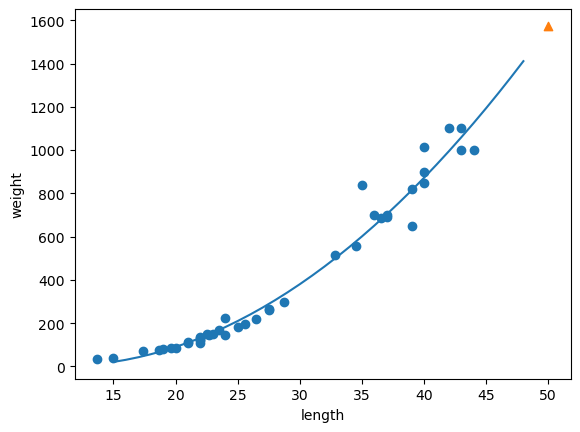

In [40]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15, 49)

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 15부터 49까지 2차 방정식 그래프를 그린다. 
plt.plot(point, 1.01 * (point ** 2) - 21.5 * point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1573.98, marker = '^')

# 축 그리고 출력 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트의 경향을 잘 따른다. <br>
그러면 훈련 세트와 테스트 세트의 $R^2$ 점수를 평가하겠다.

In [41]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


거의 도달하였지만, 아직 테스트 점수가 높은, 과소 적합이 발생하였다. 